In [1]:
# Dependencies
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User
#############################################################target_user = "realdonaldtrump"
target_user = "BarackObama"

# Create array to record all date-times of tweets
tweet_times = []

# Loop through 500 tweets
for x in range(25):
    
    # Get all tweets from target user
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        
        # Store all tweet times into the array
        tweet_times.append(tweet["created_at"])
        
        # Print tweets for preview
        if x % 100 == 0:
            print(tweet["created_at"])

# Confirm tweet counts
len(tweet_times)

Wed Feb 28 02:58:41 +0000 2018
Thu Feb 22 16:00:44 +0000 2018
Wed Feb 21 16:33:04 +0000 2018
Thu Feb 15 17:12:17 +0000 2018
Wed Feb 14 16:25:03 +0000 2018
Wed Feb 14 16:24:22 +0000 2018
Mon Jan 15 14:46:02 +0000 2018
Fri Dec 29 16:11:11 +0000 2017
Fri Dec 29 16:10:36 +0000 2017
Fri Dec 29 16:10:04 +0000 2017
Fri Dec 29 16:09:31 +0000 2017
Fri Dec 29 16:09:04 +0000 2017
Wed Dec 27 21:02:52 +0000 2017
Mon Dec 25 16:05:05 +0000 2017
Thu Dec 14 22:39:13 +0000 2017
Wed Dec 13 00:17:20 +0000 2017
Mon Dec 11 20:16:29 +0000 2017
Mon Dec 04 22:57:47 +0000 2017
Mon Nov 27 21:13:50 +0000 2017
Thu Nov 23 14:44:27 +0000 2017


500

In [4]:
# Convert all tweet times into datetime objects
tweet_time_objects = []

# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)

    # Preview that datetimes are matching
    if x % 100 == 0:
        print(tweet_times[x])
        print(tweet_datetime)

Wed Feb 28 02:58:41 +0000 2018
2018-02-28 02:58:41+00:00
Thu Nov 03 21:02:36 +0000 2016
2016-11-03 21:02:36+00:00
Mon Oct 03 19:57:20 +0000 2016
2016-10-03 19:57:20+00:00
Tue Aug 30 22:17:40 +0000 2016
2016-08-30 22:17:40+00:00
Sat Jul 30 16:39:38 +0000 2016
2016-07-30 16:39:38+00:00


In [5]:
# Calculate the time between tweets
time_in_between = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
    time_in_between.append(hrs_apart)

# Hours Between Tweets
print(f"Avg. Hours Between Tweets: {np.mean(time_in_between)}")

Avg. Hours Between Tweets: 6.901215764863059


In [6]:
time_in_between[:10]

[10.965833333333334,
 23.461111111111112,
 23.34638888888889,
 0.7872222222222223,
 0.01138888888888889,
 1.6388888888888888,
 22.580833333333334,
 0.009722222222222222,
 0.008888888888888889,
 0.009166666666666667]

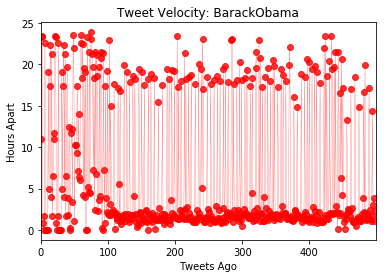

In [7]:
# Plot Time Between Tweets
plt.plot(range(len(time_in_between)), time_in_between, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")
plt.xlim([0, len(time_in_between)])
plt.ylabel("Hours Apart")
plt.xlabel("Tweets Ago")
plt.title("Tweet Velocity: %s" % target_user)
plt.show()